In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from src.postprocessing.visualization import ernesto_plotter
from src.postprocessing.metrics import compute_metrics, _mse

In [4]:
df_data = pd.read_csv("../../data/external/paper_dic24/Prova_normale/Detail_C1.5.csv", skiprows=3)
df_t_amb = pd.read_csv("../../data/external/paper_dic24/Prova_normale/Detail_Sonda_Cassone.csv", skiprows=3)

In [5]:
columns_to_drop = ['Description', 'Step', 'Cycle', 'Loop']

In [6]:
df_data = df_data.drop(columns=columns_to_drop)

In [7]:
df_data

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
0,2024/10/23 11:31:42,10,4.1719,-0.2516,0.0000,0.0000,-1.049829,0.000000,24.4024
1,2024/10/23 11:31:42,20,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000,24.4024
2,2024/10/23 11:31:43,1020,4.1726,0.0000,0.0000,0.0000,0.000000,0.000000,24.5481
3,2024/10/23 11:31:44,2020,4.1731,0.0000,0.0000,0.0000,0.000000,0.000000,24.4834
4,2024/10/23 11:31:45,3020,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000,24.4045
...,...,...,...,...,...,...,...,...,...
265328,2024/10/26 13:13:46,265323920,3.6512,-0.4965,2.5029,-13.4971,-1.812670,0.010435,21.4359
265329,2024/10/26 13:13:47,265324920,3.6516,-0.5214,2.5027,-13.4973,-1.903884,0.010434,21.4381
265330,2024/10/26 13:13:48,265325920,3.6515,-0.4987,2.5026,-13.4974,-1.821075,0.010434,21.3526
265331,2024/10/26 13:13:49,265326920,3.6512,-0.5305,2.5025,-13.4975,-1.936825,0.010433,21.4126


In [8]:
df_t_amb = df_t_amb[['TEST TIME', 'DWell Time(ms)', 'T6a']]

In [9]:
df_t_amb

,TEST TIME,DWell Time(ms),T6a
0,2024/10/23 11:32:28,10,24.3971
1,2024/10/23 11:32:29,1010,24.4154
2,2024/10/23 11:32:30,2010,24.3887
3,2024/10/23 11:32:31,3010,24.3347
4,2024/10/23 11:32:32,4010,24.3856
...,...,...,...
314940,2024/10/27 03:01:28,314940010,20.9553
314941,2024/10/27 03:01:29,314941010,20.9553
314942,2024/10/27 03:01:30,314942010,20.9553
314943,2024/10/27 03:01:31,314943010,20.9553


In [10]:
# Allineo T_amb e dataset perché il dataset inizia prima di t_amb
df_data[df_data['TEST TIME'] == df_t_amb['TEST TIME'][0]]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
47,2024/10/23 11:32:28,46020,4.1729,0.0,0.0,0.0,0.0,0.0,24.4995


In [11]:
df_data.iloc[46:49]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
46,2024/10/23 11:32:27,45020,4.1729,0.0,0.0,0.0,0.0,0.0,24.4542
47,2024/10/23 11:32:28,46020,4.1729,0.0,0.0,0.0,0.0,0.0,24.4995
48,2024/10/23 11:32:29,47020,4.1729,0.0,0.0,0.0,0.0,0.0,24.4192


In [12]:
df_data['DWell Time(ms)'] = df_data['DWell Time(ms)'] - 46010
df_data = df_data[47:]

In [13]:
df_data

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
47,2024/10/23 11:32:28,10,4.1729,0.0000,0.0000,0.0000,0.000000,0.000000,24.4995
48,2024/10/23 11:32:29,1010,4.1729,0.0000,0.0000,0.0000,0.000000,0.000000,24.4192
49,2024/10/23 11:32:30,2010,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000,24.4306
50,2024/10/23 11:32:31,3010,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000,24.4847
51,2024/10/23 11:32:32,4010,4.1728,0.0000,0.0000,0.0000,0.000000,0.000000,24.5016
...,...,...,...,...,...,...,...,...,...
265328,2024/10/26 13:13:46,265277910,3.6512,-0.4965,2.5029,-13.4971,-1.812670,0.010435,21.4359
265329,2024/10/26 13:13:47,265278910,3.6516,-0.5214,2.5027,-13.4973,-1.903884,0.010434,21.4381
265330,2024/10/26 13:13:48,265279910,3.6515,-0.4987,2.5026,-13.4974,-1.821075,0.010434,21.3526
265331,2024/10/26 13:13:49,265280910,3.6512,-0.5305,2.5025,-13.4975,-1.936825,0.010433,21.4126


In [14]:
df_t_amb['TEST TIME'] == df_data['TEST TIME'].iloc[-1]

0         False
1         False
2         False
3         False
4         False
          ...  
314940    False
314941    False
314942    False
314943    False
314944    False
Name: TEST TIME, Length: 314945, dtype: bool

In [15]:
df_data['DWell Time(ms)'].tail()

265328    265277910
265329    265278910
265330    265279910
265331    265280910
265332    265281900
Name: DWell Time(ms), dtype: int64

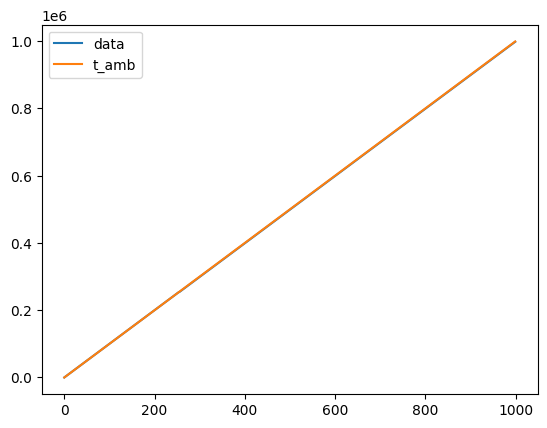

In [16]:
signal_len = 1000 #len(df_data)

plt.plot(range(0, signal_len), df_data['DWell Time(ms)'][:signal_len], label='data')
plt.plot(range(0, signal_len), df_t_amb['DWell Time(ms)'][:signal_len], label='t_amb')
plt.legend()

In [17]:
dt_data = [t2 - t1 for t2,t1 in zip(df_data['DWell Time(ms)'][1:], df_data['DWell Time(ms)'])]

In [18]:
dt_t_amb = [t2 - t1 for t2,t1 in zip(df_t_amb['DWell Time(ms)'][1:], df_t_amb['DWell Time(ms)'])]

In [20]:
df_data[df_data.duplicated(['TEST TIME'])]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
302,2024/10/23 11:36:42,254010,4.1432,-9.9930,0.0,0.0,-41.402687,-1.000000e-07,24.6057
6071,2024/10/23 13:12:50,6021910,3.5509,0.0000,0.0,-16.0,0.000000,0.000000e+00,24.1907
6132,2024/10/23 13:13:50,6081910,3.5776,-0.4942,0.0,-16.0,-1.768001,0.000000e+00,24.1753


In [21]:
df_data.loc[6069:6075]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
6069,2024/10/23 13:12:49,6021010,3.5188,-9.9819,-15.9975,-15.9975,-35.124479,-0.059971,24.2294
6070,2024/10/23 13:12:50,6021900,3.5187,-10.0107,-16.0000,-16.0000,-35.224442,-0.059979,24.1907
6071,2024/10/23 13:12:50,6021910,3.5509,0.0000,0.0000,-16.0000,0.000000,0.000000,24.1907
6072,2024/10/23 13:12:51,6022910,3.5570,0.0000,0.0000,-16.0000,0.000000,0.000000,24.2499
6073,2024/10/23 13:12:52,6023910,3.5582,0.0000,0.0000,-16.0000,0.000000,0.000000,24.2203
6074,2024/10/23 13:12:53,6024910,3.5593,0.0000,0.0000,-16.0000,0.000000,0.000000,24.2800
6075,2024/10/23 13:12:54,6025910,3.5600,0.0000,0.0000,-16.0000,0.000000,0.000000,24.2971


In [22]:
df_data.loc[6130:6135]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
6130,2024/10/23 13:13:49,6080910,3.5785,0.0000,0.0000,-16.0000,0.000000,0.000000e+00,24.1843
6131,2024/10/23 13:13:50,6081900,3.5793,0.0000,0.0000,-16.0000,0.000000,0.000000e+00,24.1706
6132,2024/10/23 13:13:50,6081910,3.5776,-0.4942,0.0000,-16.0000,-1.768001,0.000000e+00,24.1753
6133,2024/10/23 13:13:51,6082910,3.5773,-0.5055,-0.0001,-16.0001,-1.808390,-5.000000e-07,24.1773
6134,2024/10/23 13:13:52,6083910,3.5768,-0.5101,-0.0003,-16.0003,-1.824347,-1.000000e-06,24.2203
6135,2024/10/23 13:13:53,6084910,3.5772,-0.5078,-0.0004,-16.0004,-1.816434,-1.500000e-06,24.1627


In [23]:
# Rimuovo indici con DWell Time sfalsato
df_data = df_data.drop(index=[idx - 1 for idx in df_data[df_data.duplicated(['TEST TIME'])].index], axis=0)

In [24]:
dt_data = [t2 - t1 for t2,t1 in zip(df_data['DWell Time(ms)'][1:], df_data['DWell Time(ms)'])]

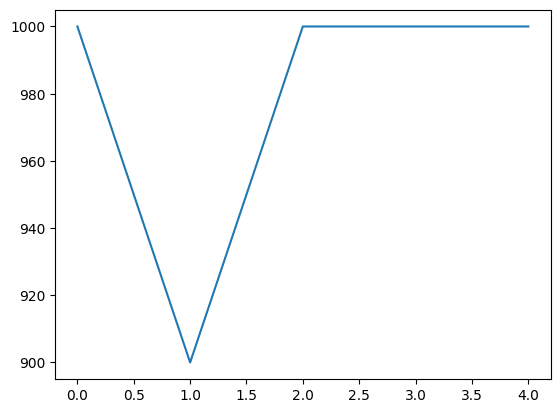

In [25]:
plt.plot(dt_data[6020:6025])

In [26]:
df_data[6020:6025]

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
6068,2024/10/23 13:12:48,6020010,3.5189,-9.9853,-15.9948,-15.9948,-35.137598,-0.059961,24.2328
6069,2024/10/23 13:12:49,6021010,3.5188,-9.9819,-15.9975,-15.9975,-35.124479,-0.059971,24.2294
6071,2024/10/23 13:12:50,6021910,3.5509,0.0000,0.0000,-16.0000,0.000000,0.000000,24.1907
6072,2024/10/23 13:12:51,6022910,3.5570,0.0000,0.0000,-16.0000,0.000000,0.000000,24.2499
6073,2024/10/23 13:12:52,6023910,3.5582,0.0000,0.0000,-16.0000,0.000000,0.000000,24.2203


In [27]:
df_t_amb[df_t_amb.duplicated(['TEST TIME'])]

,TEST TIME,DWell Time(ms),T6a
314944,2024/10/27 03:01:31,314943740,20.9332


In [28]:
df_t_amb[df_t_amb['TEST TIME'] == df_data['TEST TIME'].iloc[-1]]

,TEST TIME,DWell Time(ms),T6a
265282,2024/10/26 13:13:50,265282010,21.1622


In [29]:
df_t_amb.iloc[265280:265285]

,TEST TIME,DWell Time(ms),T6a
265280,2024/10/26 13:13:48,265280010,21.2286
265281,2024/10/26 13:13:49,265281010,21.1878
265282,2024/10/26 13:13:50,265282010,21.1622
265283,2024/10/26 13:13:51,265283010,21.2164
265284,2024/10/26 13:13:52,265284010,21.1863


In [30]:
df_data.tail()

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,T2a
265328,2024/10/26 13:13:46,265277910,3.6512,-0.4965,2.5029,-13.4971,-1.812670,0.010435,21.4359
265329,2024/10/26 13:13:47,265278910,3.6516,-0.5214,2.5027,-13.4973,-1.903884,0.010434,21.4381
265330,2024/10/26 13:13:48,265279910,3.6515,-0.4987,2.5026,-13.4974,-1.821075,0.010434,21.3526
265331,2024/10/26 13:13:49,265280910,3.6512,-0.5305,2.5025,-13.4975,-1.936825,0.010433,21.4126
265332,2024/10/26 13:13:50,265281900,3.6514,-0.5033,2.5023,-13.4977,-1.837565,0.010433,21.4232


In [163]:
df_t_amb_fixed = df_t_amb.iloc[:265283]

In [164]:
df_t_amb_fixed

,TEST TIME,DWell Time(ms),T6a
0,2024/10/23 11:32:28,10,24.3971
1,2024/10/23 11:32:29,1010,24.4154
2,2024/10/23 11:32:30,2010,24.3887
3,2024/10/23 11:32:31,3010,24.3347
4,2024/10/23 11:32:32,4010,24.3856
...,...,...,...
265278,2024/10/26 13:13:46,265278010,21.1835
265279,2024/10/26 13:13:47,265279010,21.1696
265280,2024/10/26 13:13:48,265280010,21.2286
265281,2024/10/26 13:13:49,265281010,21.1878


In [165]:
df_data

,TEST TIME,DWell Time(ms),Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh
47,2024/10/23 11:32:28,10,4.1729,0.0000,0.0000,0.0000,0.000000,0.000000
48,2024/10/23 11:32:29,1010,4.1729,0.0000,0.0000,0.0000,0.000000,0.000000
49,2024/10/23 11:32:30,2010,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000
50,2024/10/23 11:32:31,3010,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000
51,2024/10/23 11:32:32,4010,4.1728,0.0000,0.0000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
265328,2024/10/26 13:13:46,265277910,3.6512,-0.4965,2.5029,-13.4971,-1.812670,0.010435
265329,2024/10/26 13:13:47,265278910,3.6516,-0.5214,2.5027,-13.4973,-1.903884,0.010434
265330,2024/10/26 13:13:48,265279910,3.6515,-0.4987,2.5026,-13.4974,-1.821075,0.010434
265331,2024/10/26 13:13:49,265280910,3.6512,-0.5305,2.5025,-13.4975,-1.936825,0.010433


In [168]:
df_res = df_data.merge(df_t_amb_fixed, on='TEST TIME')

In [173]:
df_res = df_res.rename(columns={'T2a': 'Temp(degC)', 'T6a': 'T_amb', 'TEST TIME':'Time'})

In [174]:
df_res

,Time,DWell Time(ms)_x,Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,DWell Time(ms)_y,T_amb
0,2024/10/23 11:32:28,10,4.1729,0.0000,0.0000,0.0000,0.000000,0.000000,10,24.3971
1,2024/10/23 11:32:29,1010,4.1729,0.0000,0.0000,0.0000,0.000000,0.000000,1010,24.4154
2,2024/10/23 11:32:30,2010,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000,2010,24.3887
3,2024/10/23 11:32:31,3010,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000,3010,24.3347
4,2024/10/23 11:32:32,4010,4.1728,0.0000,0.0000,0.0000,0.000000,0.000000,4010,24.3856
...,...,...,...,...,...,...,...,...,...,...
265278,2024/10/26 13:13:46,265277910,3.6512,-0.4965,2.5029,-13.4971,-1.812670,0.010435,265278010,21.1835
265279,2024/10/26 13:13:47,265278910,3.6516,-0.5214,2.5027,-13.4973,-1.903884,0.010434,265279010,21.1696
265280,2024/10/26 13:13:48,265279910,3.6515,-0.4987,2.5026,-13.4974,-1.821075,0.010434,265280010,21.2286
265281,2024/10/26 13:13:49,265280910,3.6512,-0.5305,2.5025,-13.4975,-1.936825,0.010433,265281010,21.1878


In [175]:
df_res.to_csv("../data/ground/paper_dic24/prova_normale.csv", index=False)

<Axes: >

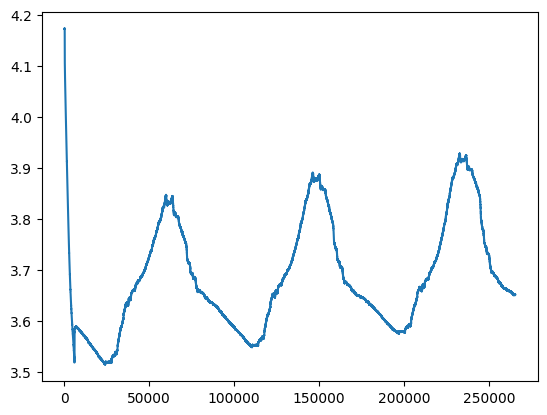

In [176]:
df_res['Voltage(V)'].plot()

In [177]:
max(df_res['Voltage(V)'])

4.1733

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("../../data/ground/paper_dic24/prova_normale.csv")

In [6]:
df['T_amb'] += 0.25

In [7]:
df

,Time,DWell Time(ms)_x,Voltage(V),Current(A),Capacity(Ah),Total Capacity(Ah),Power(W),KWh,Temp(degC),DWell Time(ms)_y,T_amb
0,2024/10/23 11:32:28,10,4.1729,0.0000,0.0000,0.0000,0.000000,0.000000,24.4995,10,24.6471
1,2024/10/23 11:32:29,1010,4.1729,0.0000,0.0000,0.0000,0.000000,0.000000,24.4192,1010,24.6654
2,2024/10/23 11:32:30,2010,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000,24.4306,2010,24.6387
3,2024/10/23 11:32:31,3010,4.1730,0.0000,0.0000,0.0000,0.000000,0.000000,24.4847,3010,24.5847
4,2024/10/23 11:32:32,4010,4.1728,0.0000,0.0000,0.0000,0.000000,0.000000,24.5016,4010,24.6356
...,...,...,...,...,...,...,...,...,...,...,...
265278,2024/10/26 13:13:46,265277910,3.6512,-0.4965,2.5029,-13.4971,-1.812670,0.010435,21.4359,265278010,21.4335
265279,2024/10/26 13:13:47,265278910,3.6516,-0.5214,2.5027,-13.4973,-1.903884,0.010434,21.4381,265279010,21.4196
265280,2024/10/26 13:13:48,265279910,3.6515,-0.4987,2.5026,-13.4974,-1.821075,0.010434,21.3526,265280010,21.4786
265281,2024/10/26 13:13:49,265280910,3.6512,-0.5305,2.5025,-13.4975,-1.936825,0.010433,21.4126,265281010,21.4378


In [9]:
df.to_csv("../../data/ground/paper_dic24/prova_normale_with_Tamb_offset.csv", index=False)